In [2]:
# Import dependency libraries.
import pandas as pd

In [3]:
# Basic user information, data from users.dat
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
user_df = pd.read_csv('./Data/ml-1m/users.dat',
                      sep='::',
                      header=None,
                      names=unames,
                      engine='python')

# Movie information, data from movies.dat
mnames = ['movie_id', 'title', 'genres']
movies_df = pd.read_csv('./Data/ml-1m/movies.dat',
                        sep='::',
                        header=None,
                        names=mnames,
                        engine='python',
                        encoding='ISO-8859-1')

# Rating information, data from rating.dat
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings_df = pd.read_csv('./Data/ml-1m/ratings.dat',
                         sep='::',
                         header=None,
                         engine='python',
                         names=rnames)

In [4]:
print("user information dataframe")
user_df.head()

user information dataframe


,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [138]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zip         6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [139]:
print("movie information dataframe")
movies_df.head()

movie information dataframe


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [140]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [141]:
print("rating information dataframe")
ratings_df.head()

rating information dataframe


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [142]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   user_id    1000209 non-null  int64
 1   movie_id   1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


Remove the year from the movies.dat data file title: Remove the year from the title by regular expression.

In [5]:
import re
patter = re.compile(r'^(.*)\((\d+)\)$')
title = {val:patter.match(val).group(1) for i,val in enumerate(set(movies_df['title']))}
movies_df['title'] = movies_df['title'].map(title)  
movies_df.head()

,movie_id,title,genres
0,1,Toy Story,Animation|Children's|Comedy
1,2,Jumanji,Adventure|Children's|Fantasy
2,3,Grumpier Old Men,Comedy|Romance
3,4,Waiting to Exhale,Comedy|Drama
4,5,Father of the Bride Part II,Comedy


Convert timestamps in the ratings.dat file to a specific time: Convert timestamps to a specific time with the pd.to_datetime function in Pandas.



In [144]:
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'],unit='s')
ratings_df.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,2000-12-31 22:12:40
1,1,661,3,2000-12-31 22:35:09
2,1,914,3,2000-12-31 22:32:48
3,1,3408,4,2000-12-31 22:04:35
4,1,2355,5,2001-01-06 23:38:11


Change DataFrame column name: Change the column name by pandas.DataFrame.rename function, the specific code is as follows.


In [145]:
ratings_df.rename(columns={'timestamp':'time'},inplace=True)
ratings_df.tail()

,user_id,movie_id,rating,time
1000204,6040,1091,1,2000-04-26 02:35:41
1000205,6040,1094,5,2000-04-25 23:21:27
1000206,6040,562,5,2000-04-25 23:19:06
1000207,6040,1096,4,2000-04-26 02:20:48
1000208,6040,1097,4,2000-04-26 02:19:29


Change the time format to 'year-month-day':
1. Use the to_datetime function in Pandas to convert the date column from object format to datetime format.
2. Fetch the year, month and day from strftime('%Y%m%d'), and apply this function to the ratings_df['timestamp'] column with apply lambda.

In [146]:
import datetime
date_df = pd.DataFrame({'time':ratings_df['time']})
date_df['date']=pd.to_datetime(date_df['time'])
date_df.tail()


,time,date
1000204,2000-04-26 02:35:41,2000-04-26 02:35:41
1000205,2000-04-25 23:21:27,2000-04-25 23:21:27
1000206,2000-04-25 23:19:06,2000-04-25 23:19:06
1000207,2000-04-26 02:20:48,2000-04-26 02:20:48
1000208,2000-04-26 02:19:29,2000-04-26 02:19:29


In [147]:
ratings_df['time'] = date_df['date'].apply(lambda x:x.strftime('%Y-%m-%d'))
ratings_df.tail()

,user_id,movie_id,rating,time
1000204,6040,1091,1,2000-04-26
1000205,6040,1094,5,2000-04-25
1000206,6040,562,5,2000-04-25
1000207,6040,1096,4,2000-04-26
1000208,6040,1097,4,2000-04-26


Merge data: pandas.merge combines all data into one table. merge has four joins (default is inner).
1. inner connection (inner), take the intersection set
2. outer join (outer), take the concatenation, and fill with NaN;
3. Left join (left), the left DataFrame takes all, the right DataFrame takes some;
4. right join(right), right DataFrame takes all, left DataFrame takes some;


DataFrame.merge(right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=None, indicator=False, validate=None)

Merge movies_df and ratings_df into movies_rating_df dataset (two datasets merged).

In [10]:
# Sub-data merging
movies_ratings_df = pd.merge(ratings_df,movies_df,on='movie_id')
movies_ratings_df.head()

,user_id,movie_id,rating,timestamp,title,genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest,Drama
1,1,661,3,978302109,James and the Giant Peach,Animation|Children's|Musical
2,1,914,3,978301968,My Fair Lady,Musical|Romance
3,1,3408,4,978300275,Erin Brockovich,Drama
4,1,2355,5,978824291,"Bug's Life, A",Animation|Children's|Comedy


Merge movies_df, ratings_df & user_df into movies_rating_user_df dataset (multiple datasets merged).

In [8]:
movies_ratings_user_df = pd.merge(pd.merge(ratings_df,movies_df),user_df)
movies_ratings_user_df.head()

,user_id,movie_id,rating,timestamp,title,genres,gender,age,occupation,zip
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest,Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach,Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady,Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich,Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A",Animation|Children's|Comedy,F,1,10,48067


### Data  Analysis

Statistical variables: Pandas provides describe function for statistical variables to see the statistics of variables in user_df.

In [7]:
user_df.describe()

,user_id,age,occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


Grouping statistics: Pandas use groupby function for grouping statistics, groupby grouping is actually the original DataFrame in accordance with the groupby field for division, groupby can be added after the count (count), sum (sum), for the mean (mean) and other operations.

DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, observed=False, dropna=True)

Statistics of the 5 most rated movies: first group the movies according to their titles, then use the size function to calculate the number of samples in each group, and finally output the top 5 observations in descending order.

In [11]:
top_5_ratings_movies_df = movies_ratings_df.groupby('title').size().sort_values(ascending=False)[:5]
top_5_ratings_movies_df

title
American Beauty                                    3428
Star Wars: Episode IV - A New Hope                 2991
Star Wars: Episode V - The Empire Strikes Back     2990
Star Wars: Episode VI - Return of the Jedi         2883
Jurassic Park                                      2672
dtype: int64

Statistics on the mean value of movie ratings (grouped by user)

Statistics on the mean value of movie ratings (grouped by user)

In [12]:
# Mean value of ratings of movies seen by user ids
movie_ratings_by_user_mean_df= movies_ratings_df.groupby('user_id',as_index=False)['rating'].mean()
movie_ratings_by_user_mean_df.head()

,user_id,rating
0,1,4.188679
1,2,3.713178
2,3,3.901961
3,4,4.190476
4,5,3.146465


In [155]:
movie_ratings_by_user_mean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  6040 non-null   int64  
 1   rating   6040 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 94.5 KB


Counting the mean of each movie rating (grouped by movie)

In [157]:
# Mean value of each movie's rating by movie id
every_movie_ratings_mean_df= movies_ratings_df.groupby('movie_id',as_index=False)['rating'].mean()
every_movie_ratings_mean_df.head()


,movie_id,rating
0,1,4.146846
1,2,3.201141
2,3,3.016736
3,4,2.729412
4,5,3.006757


In [158]:
every_movie_ratings_mean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3706 entries, 0 to 3705
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   movie_id  3706 non-null   int64  
 1   rating    3706 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 58.0 KB


Grouping and aggregation statistics: Pandas provides aggregate function to realize the aggregation operation, which can be abbreviated as agg, and can be used together with groupby, the role is to group the object to make the given calculation method to re-take the value, support in accordance with the fields are given different statistical methods.
Group by movie_id and title, and calculate the average rating, take the first 5 data.

In [13]:
# Group by movie_id and title and calculate the mean of the ratings for the top 5 data. 
import numpy as np
movies_ratings_by_movie_title_df = movies_ratings_df.groupby(['movie_id','title'],as_index=False)['rating'].aggregate(np.mean)
movies_ratings_by_movie_title_df.head()


/var/folders/17/7chlm8ns3kx6fz2y58z03rlh0000gn/T/ipykernel_83715/2307076092.py:3: FutureWarning: The provided callable <function mean at 0x107d4c900> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  movies_ratings_by_movie_title_df = movies_ratings_df.groupby(['movie_id','title'],as_index=False)['rating'].aggregate(np.mean)


,movie_id,title,rating
0,1,Toy Story,4.146846
1,2,Jumanji,3.201141
2,3,Grumpier Old Men,3.016736
3,4,Waiting to Exhale,2.729412
4,5,Father of the Bride Part II,3.006757


Statistics of the average value of each movie rating (according to gender): pivot table pivot_table is an operation method similar to groupby, commonly used in EXCEL, pivot table according to the columns of the input data, the output, constantly subdividing the data to form a number of dimensions of the cumulative information of the two-dimensional data table.

DataFrame.pivot_table(values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort=True)
- values ： Filter the target data, the default is all the data, you can use the values parameter to set the data columns we want to display.
- index : Row index, required parameters
- columns :Column index of the pivot table, not a required parameter, used in the same way as index.
- aggfunc :Functional operations performed when aggregating data, the default is the average, but also sum, count, etc.
- fill_value :Fill for null values
- margins :Extra columns, summation of rows and columns by default
- dropna : De-duplication is enabled by default 


In [14]:
# Getting the mean value of ratings for the same movie based on gender
mean_rating = movies_ratings_user_df.pivot_table('rating',index='title',columns='gender',aggfunc='mean')
mean_rating.head()


gender,F,M
title,,
"$1,000,000 Duck",3.375000,2.761905
'Night Mother,3.388889,3.352941
'Til There Was You,2.675676,2.733333
"'burbs, The",2.793478,2.962085
...And Justice for All,3.828571,3.689024


In [15]:
mean_rating.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3664 entries, $1,000,000 Duck  to eXistenZ 
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F       3439 non-null   float64
 1   M       3629 non-null   float64
dtypes: float64(2)
memory usage: 85.9+ KB


gender
F    3.620366
M    3.568879
Name: rating, dtype: float64


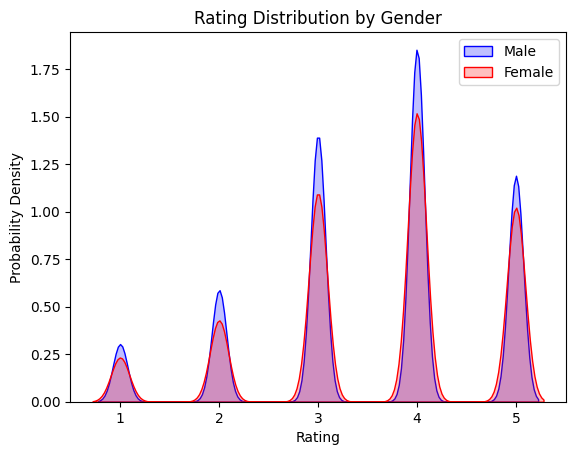

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the average rating for different genders
average_rating_by_gender = movies_ratings_user_df.groupby('gender')['rating'].mean()
print(average_rating_by_gender)
 
# Draw a gender score histogram
sns.kdeplot(data=movies_ratings_user_df[movies_ratings_user_df['gender'] == 'M']['rating'],  label='Male', color='blue', fill=True)
sns.kdeplot(data=movies_ratings_user_df[movies_ratings_user_df['gender'] == 'F']['rating'], label='Female', color='red', fill=True)
plt.title('Rating Distribution by Gender')
plt.xlabel('Rating')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


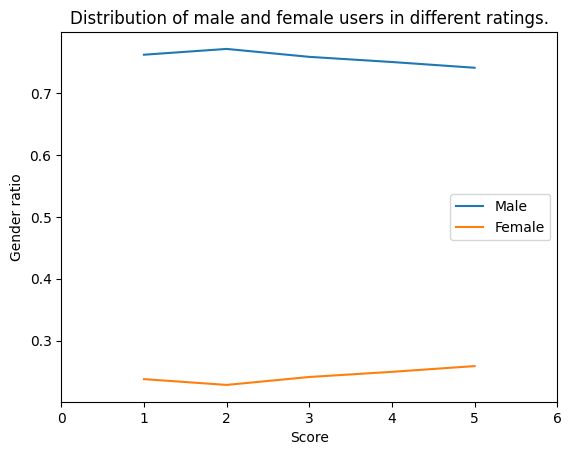

In [59]:
import matplotlib.pyplot as plt

male = movies_ratings_user_df[movies_ratings_user_df['gender'] == 'M']
female = movies_ratings_user_df[movies_ratings_user_df['gender'] == 'F']


male_scores = [1,2,3,4,5]
male_people = []
for score in male_scores:
    count = len(male[male['rating'] == score])
    count2 = len(movies_ratings_user_df[movies_ratings_user_df['rating'] == score])
    ratio = count/count2
    male_people.append(ratio)

female_scores = [1,2,3,4,5]
count3 = len(female)
female_people = []
for score in female_scores:
    count = len(female[female['rating'] == score])
    count2 = len(movies_ratings_user_df[movies_ratings_user_df['rating'] == score])
    ratio = count/count2
    female_people.append(ratio)

# Setting the range of the X-axis
plt.xlim(0, 6)
 
# Setting the X-axis scale
plt.xticks(np.linspace(0, 6, 7))
 
# Plotting line graphs
plt.plot(male_scores, male_people, label='Male')
plt.plot(female_scores, female_people, label='Female')
# Add title and axis labels
plt.title('Distribution of male and female users in different ratings.')
plt.xlabel('Score')
plt.ylabel('Gender ratio')

# Show legend
plt.legend()

# Display Graphics
plt.show()

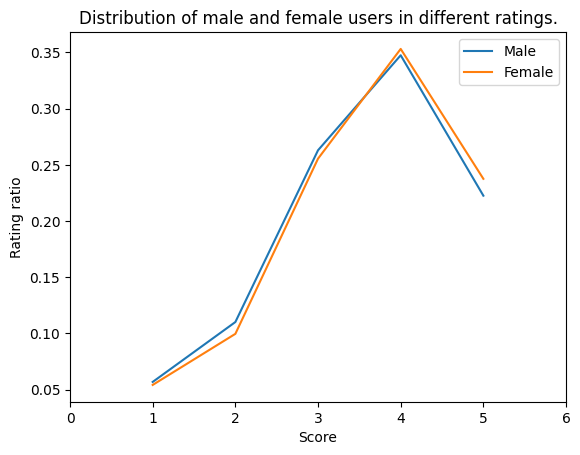

In [63]:
import matplotlib.pyplot as plt

male = movies_ratings_user_df[movies_ratings_user_df['gender'] == 'M']
female = movies_ratings_user_df[movies_ratings_user_df['gender'] == 'F']


male_scores = [1,2,3,4,5]
male_people = []
count2 = len(male)
for score in male_scores:
    count = len(male[male['rating'] == score])
#     count2 = len(movies_ratings_user_df[movies_ratings_user_df['imdbId'] == score])
    ratio = count/count2
    male_people.append(ratio)

female_scores = [1,2,3,4,5]
count3 = len(female)
female_people = []
for score in female_scores:
    count = len(female[female['rating'] == score])
#     count2 = len(movies_ratings_user_df[movies_ratings_user_df['imdbId'] == score])
    ratio = count/count3
    female_people.append(ratio)
    
    
# Setting the range of the X-axis
plt.xlim(0, 6)
 
# Setting the X-axis scale
plt.xticks(np.linspace(0, 6, 7))

# Plotting line graphs
plt.plot(male_scores, male_people, label='Male')
plt.plot(female_scores, female_people, label='Female')
# Add title and axis labels
plt.title('Distribution of male and female users in different ratings.')
plt.xlabel('Score')
plt.ylabel('Rating ratio')

# Show legend
plt.legend()

# Display Graphics
plt.show()

In [64]:
len(female)

246440

In [65]:
len(male)

753769

In [18]:
female_scores = [1,2,3,4,5]

female_people = 0
for score in female_scores:
    count = len(female[female['rating'] == score])
#     count2 = len(movies_ratings_user_df[movies_ratings_user_df['imdbId'] == score])
    female_people = female_people + count*score
    
print(female_people/246440)

3.6203660120110372


In [169]:
male_scores = [1,2,3,4,5]

male_people = 0
for score in male_scores:
    count = len(male[male['rating'] == score])
#     count2 = len(movies_ratings_user_df[movies_ratings_user_df['imdbId'] == score])
    male_people = male_people + count*score
    
print(male_people/753769)

3.5688785290984373


#### Dataset segmentation:

The movies_ratings_user_df dataset is divided into training and validation sets in the ratio of 8:2.

In [170]:
print("The size of the original dataset:")
len(movies_ratings_user_df)

The size of the original dataset:


1000209

In [171]:
from sklearn.model_selection import train_test_split
data_train,data_test = train_test_split(movies_ratings_user_df,test_size=0.3, random_state=0)

In [172]:
print("The size of the data_train dataset:")
len(data_train)

The size of the data_train dataset:


700146

In [173]:
print("The size of the data_test dataset:")
len(data_test)

The size of the data_test dataset:


300063

Are there certain words that feature more often in Movie Titles? I'll attempt to figure this out using a word-cloud visualization.

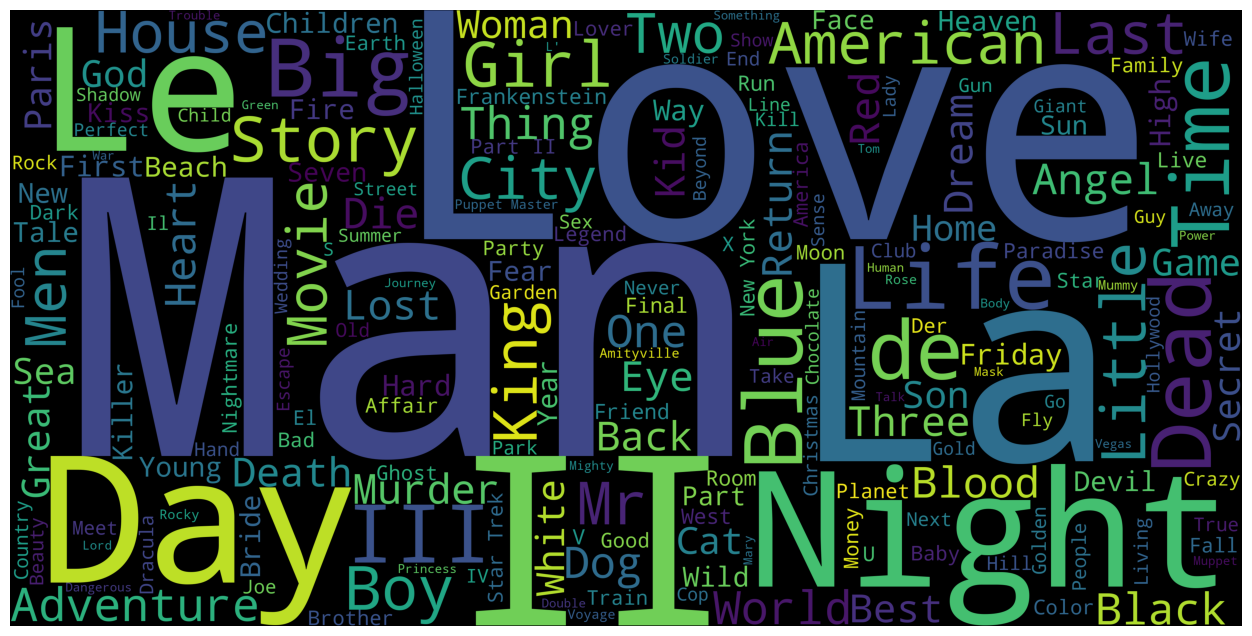

In [40]:
# Import new libraries
%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Create a wordcloud of the movie titles
movies_df['title'] = movies_df['title'].fillna("").astype('str')
title_corpus = ' '.join(movies_df['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

#### Model Traing
Popular(i,u)=α×Current\_Popular(i)+β×Trend(i,t)+ϵ×Similarity(u,others)

#### Content-Based Recommendation Model


In [174]:
# Break up the big genre string into a string array
movies_ratings_user_df['genres'] = movies_ratings_user_df['genres'].str.split('|')
movies_df['genres'] = movies_df['genres'].str.split('|')
# # Convert genres to string value
movies_ratings_user_df['genres'] = movies_ratings_user_df['genres'].fillna("").astype('str')
movies_df['genres'] = movies_df['genres'].fillna("").astype('str')
movies_ratings_user_df.head()

,user_id,movie_id,rating,time,title,genres,gender,age,occupation,zip
0,1,1193,5,2000-12-31,One Flew Over the Cuckoo's Nest,['Drama'],F,1,10,48067
1,1,661,3,2000-12-31,James and the Giant Peach,"['Animation', ""Children's"", 'Musical']",F,1,10,48067
2,1,914,3,2000-12-31,My Fair Lady,"['Musical', 'Romance']",F,1,10,48067
3,1,3408,4,2000-12-31,Erin Brockovich,['Drama'],F,1,10,48067
4,1,2355,5,2001-01-06,"Bug's Life, A","['Animation', ""Children's"", 'Comedy']",F,1,10,48067


In [175]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=1, stop_words='english')
tfidf_matrix = tf.fit_transform(movies_df['genres'])
tfidf_matrix.shape

(3883, 127)

In [176]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim[:4, :4]

array([[1.        , 0.14193614, 0.09010857, 0.1056164 ],
       [0.14193614, 1.        , 0.        , 0.        ],
       [0.09010857, 0.        , 1.        , 0.1719888 ],
       [0.1056164 , 0.        , 0.1719888 , 1.        ]])

In [177]:
# Build a 1-dimensional array with movie titles
titles = movies_df['title']
indices = pd.Series(movies_df.index, index=movies_df['title'])

# Function that get movie recommendations based on the cosine similarity score of movie genres
def genre_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

try and get the top recommendations for a few movies and see how good the recommendations are.

In [41]:
genre_recommendations('Good Will Hunting ').head(20)

25                                           Othello 
26                                      Now and Then 
29     Shanghai Triad (Yao a yao yao dao waipo qiao) 
30                                   Dangerous Minds 
35                                  Dead Man Walking 
39                          Cry, the Beloved Country 
42                                       Restoration 
52                                          Lamerica 
54                                           Georgia 
56                             Home for the Holidays 
61                                Mr. Holland's Opus 
66                                          Two Bits 
77                               Crossing Guard, The 
79             White Balloon, The (Badkonake Sefid ) 
81                          Antonia's Line (Antonia) 
82          Once Upon a Time... When We Were Colored 
89                       Journey of August King, The 
92                                   Beautiful Girls 
95                          

In [42]:
genre_recommendations('Toy Story ').head(20)


1050                     Aladdin and the King of Thieves 
2072                                   American Tail, An 
2073                 American Tail: Fievel Goes West, An 
2285                                  Rugrats Movie, The 
2286                                       Bug's Life, A 
3045                                         Toy Story 2 
3542                                      Saludos Amigos 
3682                                         Chicken Run 
3685             Adventures of Rocky and Bullwinkle, The 
236                                       Goofy Movie, A 
12                                                 Balto 
241                                     Gumby: The Movie 
310                                   Swan Princess, The 
592                                            Pinocchio 
612                                      Aristocats, The 
700                                     Oliver & Company 
876     Land Before Time III: The Time of the Great Gi...
1010          

In [43]:
genre_recommendations('Saving Private Ryan ').head(20)


461            Heaven & Earth 
1204        Full Metal Jacket 
1214     Boat, The (Das Boot) 
1222                    Glory 
1545                G.I. Jane 
1959      Saving Private Ryan 
2358       Thin Red Line, The 
2993         Longest Day, The 
3559            Flying Tigers 
3574    Fighting Seabees, The 
3585    Guns of Navarone, The 
3684             Patriot, The 
40                Richard III 
153            Beyond Rangoon 
332         Walking Dead, The 
523          Schindler's List 
641        Courage Under Fire 
967          Nothing Personal 
979           Michael Collins 
1074                  Platoon 
Name: title, dtype: object

Using content-based recommendations has the following advantages. Data from other users is not required, so there is no cold-start or sparsity problem. Recommendations can be made to users with unique tastes. New and unpopular items can be recommended. It is possible to provide explanations for recommended items by listing the content features (in this case film genres) that led to the item being recommended.

However, there are some drawbacks to using this approach: It is difficult to find suitable features. It is not possible to recommend items outside the user's content profile. It is not possible to take advantage of other users' judgements about quality.

#### Collaborative Filtering Recommendation Model


In [187]:
# Fill NaN values in user_id and movie_id column with 0
ratings_df['user_id'] = ratings_df['user_id'].fillna(0)
ratings_df['movie_id'] = ratings_df['movie_id'].fillna(0)

# Replace NaN values in rating column with average of all values
ratings_df['rating'] = ratings_df['rating'].fillna(ratings_df['rating'].mean())

In [188]:
# Randomly sample 1% of the ratings dataset
small_data = ratings_df.sample(frac=0.05)
# Check the sample info
print(small_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 50010 entries, 129139 to 186209
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   user_id    50010 non-null  int64
 1   movie_id   50010 non-null  int64
 2   rating     50010 non-null  int64
 3   timestamp  50010 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB
None


Now I use the scikit-learn library to split the dataset into testing and training. Cross_validation.train_test_split shuffles and splits the data into two datasets according to the percentage of test examples, which in this case is 0.2.

In [189]:
from sklearn.model_selection import train_test_split
train_dataset, test_dataset = train_test_split(small_data, test_size=0.2)


In [190]:
train_dataset.head()

,user_id,movie_id,rating,timestamp
259355,1587,1817,3,974741559
677475,4060,2119,3,965494857
910945,5511,2100,5,959788224
682313,4085,3466,3,965453675
702661,4213,1792,5,965839150


In [191]:
# Create two user-item matrices, one for training and another for testing
train_data_matrix = train_dataset[['user_id', 'movie_id', 'rating']].to_numpy()
test_data_matrix = test_dataset[['user_id', 'movie_id', 'rating']].to_numpy()

# Check their shape
print(train_data_matrix.shape)
print(test_data_matrix.shape)

(40008, 3)
(10002, 3)


Now, I use sklearn's pairwise_distances function to compute the Pearson correlation coefficient. This method provides a safe way to use the distance matrix as input while maintaining compatibility with many other algorithms that use vector arrays.

In [192]:
print(data_train.describe())  # Get a basic statistical description of the data to see the distribution of ratings
train_dataset.head(10)
# print(train_data.duplicated().sum())


             user_id       movie_id         rating            age  \
count  700146.000000  700146.000000  700146.000000  700146.000000   
mean     3025.187949    1865.305705       3.582447      29.738113   
std      1729.281842    1095.915662       1.117809      11.756977   
min         1.000000       1.000000       1.000000       1.000000   
25%      1505.000000    1029.000000       3.000000      25.000000   
50%      3071.000000    1835.000000       4.000000      25.000000   
75%      4478.000000    2770.000000       4.000000      35.000000   
max      6040.000000    3952.000000       5.000000      56.000000   

          occupation  
count  700146.000000  
mean        8.036111  
std         6.531246  
min         0.000000  
25%         2.000000  
50%         7.000000  
75%        14.000000  
max        20.000000  


,user_id,movie_id,rating,timestamp
259355,1587,1817,3,974741559
677475,4060,2119,3,965494857
910945,5511,2100,5,959788224
682313,4085,3466,3,965453675
702661,4213,1792,5,965839150
24731,174,480,5,977149948
432468,2638,2993,3,973706421
793225,4742,1983,3,963331119
67658,453,1247,5,976235382
424392,2573,3755,5,973908202


In [193]:
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(train_dataset, metric='correlation')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation[:4, :4])

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [194]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(train_data_matrix.T, metric='correlation')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation[:8, :8])

[[ 1.         -0.02020319  0.01679553]
 [-0.02020319  1.         -0.06372214]
 [ 0.01679553 -0.06372214  1.        ]]


In [195]:
# Function to predict ratings
def predict(ratings_df, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings_df.mean(axis=1)
        # Use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings_df - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings_df.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

#### Evaluation
There are many evaluation metrics but one of the most popular metric used to evaluate accuracy of predicted ratings is Root Mean Squared Error (RMSE). I will use the mean_square_error (MSE) function from sklearn, where the RMSE is just the square root of MSE.


In [63]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Function to calculate RMSE
def rmse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return sqrt(mean_squared_error(pred, actual))

In [64]:
# Predict ratings on the training data with both similarity score
user_prediction = predict(train_data_matrix, user_correlation, type='user')
item_prediction = predict(train_data_matrix, item_correlation, type='item')

# RMSE on the test data
print('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

User-based CF RMSE: 1357.1990856813204
Item-based CF RMSE: 1627.9170511205893


In [65]:
# RMSE on the train data
print('User-based CF RMSE: ' + str(rmse(user_prediction, train_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, train_data_matrix)))


User-based CF RMSE: 965.8473576422887
Item-based CF RMSE: 143.9351801581425


In [111]:
#------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------

### Simulation environment settings
Parameter	Parameter Value

Streaming file duration	60～120 min

Number of user requests in the simulation	20,000

Number of streaming files	3952

Number of users	6040

Maximum number of online users allowed by the system	200

Proxy server and streaming server network latency	150 ms

Count the number of records per user: Use the groupby and count methods to count the number of records per user in the ratings table. To filter out users with enough data.

In [19]:
import pandas as pd

# of records counted per user
user_counts = ratings_df.groupby('user_id').size()

# Filter out users with more than 100 records
active_users = user_counts[user_counts > 160].index.tolist()

Randomly select 200 users from those who fulfil the condition: filter those users from user_df who have more than 160 records in rating_df.

In [20]:

# 200 randomly selected from the eligible users
selected_users = user_df[user_df['user_id'].isin(active_users)].sample(n=200, random_state=42)
print(selected_users)


      user_id gender  age  occupation    zip
5014     5015      M   35           6  92672
4403     4404      M   25           1  57106
3137     3138      M   35          17  46229
3400     3401      M   35           7  76109
1050     1051      F   25           0  60513
...       ...    ...  ...         ...    ...
2171     2172      M   18          20  60641
2610     2611      M   25           3  07719
4591     4592      M   18           4  66044
2927     2928      M   25           2  90068
408       409      M   18          12  55122

[200 rows x 5 columns]


In [22]:
# Filter out the film IDs of these users
movie_ids = ratings_df[ratings_df['user_id'].isin(selected_users['user_id'])][['movie_id']]

# show
print(movie_ids.head(10))

       movie_id
11499       647
11500       648
11501      3863
11502      1250
11503      3869
11504      3798
11505      2997
11506       586
11507         1
11508      3005


Based on the above screened users with sufficient user behavioural data, 20,000 (100 per capita) pieces of behavioural data are randomly generated and used to simulate the user's future data request behaviour.

In [23]:
import pandas as pd

# Create an empty DataFrame to store the results
future_requests = pd.DataFrame()
# print(sampled_users)
# Iterate over each user ID in sampled_users
for user_id in selected_users['user_id']:
    # Filter all data for this user from rating_df
    user_data = ratings_df[ratings_df['user_id'] == user_id]
    # print(len(user_data))
    random_data_future = user_data.sample(n=100, random_state=42,  replace=True)
    
    # Add the selected data to the resulting DataFrame
    future_requests = pd.concat([future_requests, random_data_future], ignore_index=True)

# View extracted samples
print(future_requests)

       user_id  movie_id  rating  timestamp
0         5015      2469       4  962593782
1         5015      3269       3  962594504
2         5015        11       5  962594375
3         5015      2472       3  962593835
4         5015      2418       5  962593709
...        ...       ...     ...        ...
19995      409      2501       3  976290899
19996      409      1777       4  976289494
19997      409      1101       4  976292126
19998      409      1350       4  976291159
19999      409        50       5  976290100

[20000 rows x 4 columns]


On average, each user will request 100 videos, set the caching ratio below 60%, i.e., the maximum number of videos to be cached is 100*0.6=60. Here, the caching ratios are set to 10%, 20%, 30%, 40%, 50% and 60% respectively.

caching ratios is 10%， the number of movies is 10.
Separately for each user, 10 records are randomly selected in rating as the user's historical data and these films are cached.

In [29]:
import pandas as pd

# Create an empty DataFrame to store the results
history_requests = pd.DataFrame()
# print(sampled_users)
# Iterate over each user ID in sampled_users
for user_id in selected_users['user_id']:
    # Filter all data for this user from rating_df
    user_data = ratings_df[ratings_df['user_id'] == user_id]
    # print(len(user_data))
    random_data_history = user_data.sample(n=50, random_state=52,  replace=True)
    
    # Add the selected data to the resulting DataFrame
    history_requests = pd.concat([history_requests, random_data_history], ignore_index=True)

# View extracted samples
print(history_requests)

      user_id  movie_id  rating  timestamp
0        5015      2369       3  962584353
1        5015      2863       5  962591270
2        5015       953       5  962592647
3        5015      2321       5  962594847
4        5015      1586       3  962595786
...       ...       ...     ...        ...
9995      409      3471       5  976290533
9996      409      2871       4  976290838
9997      409      1079       4  976290454
9998      409      3362       3  976289100
9999      409      2762       4  976290136

[10000 rows x 4 columns]


Simulate the user's cache queue and set the size of the cache queue according to the pre-set cache size. Place each user's own historical access data into the cache queue, which needs to be de-duplicated.

In [30]:
# Maximum size of the unique cache queue
MAX_CACHE_SIZE = 50

# Create a dictionary to store the cache queue for each user
user_caches = {}

for user in history_requests['user_id']:
    # For each user, select their video recordings, de-emphasise them, and then take the top 10
    unique_videos = history_requests[history_requests['user_id'] == user]['movie_id'].unique()[:MAX_CACHE_SIZE]
    user_caches[user] = list(unique_videos)

i = 0
# # Print per-user cache queue, convert np.int64 to int
for user, cache in user_caches.items():
    # Convert each element to int using list derivation
    if(i > 5):
        break
    else:
        i+=1
        cache_as_int = [int(video) for video in cache]
        print(f"User {user}'s cache: {cache_as_int}")


User 5015's cache: [2369, 2863, 953, 2321, 1586, 3525, 1136, 1307, 3543, 3504, 597, 3496, 3060, 3261, 2918, 2114, 440, 3360, 1206, 909, 1018, 904, 3253, 3654, 3639, 2758, 3070, 2005, 3088, 1287, 2502, 2866, 3479, 552, 3359, 2390, 1777, 3549, 3681, 2336, 599, 3451, 341, 1946, 3498, 1917, 1500, 3308]
User 4404's cache: [349, 454, 595, 20, 2107, 3270, 2672, 358, 2793, 3253, 1367, 435, 1673, 1432, 1918, 237, 2355, 1227, 50, 2389, 999, 3254, 1320, 3378, 1883, 491, 2431, 1615, 3489, 2702, 1885, 3107, 2889, 1641, 1616, 22, 1586, 504, 3179, 991, 3082, 225, 442, 1438, 542, 1779, 2514, 805, 2282]
User 3138's cache: [3552, 737, 593, 1005, 631, 3705, 541, 1597, 1028, 2141, 3070, 589, 2072, 1692, 3729, 3408, 2012, 3725, 2038, 3774, 2950, 969, 900, 296, 2530, 419, 2085, 2414, 1032, 1235, 2971, 420, 1208, 2694, 674, 3692, 1587, 2748, 150, 333, 2520, 3868, 3167, 1499, 1608]
User 3401's cache: [2764, 2017, 2376, 2418, 904, 1562, 1682, 3445, 2423, 1395, 382, 1081, 2650, 1690, 1258, 2268, 2078, 688, 3635

Calculate the video cache priority score：  Popular(i,u)=0.2×Current\_Popular(i)+0.2×Trend(i,t)
 +0.6×Recommended\_Score(i) 

Historical data per video: number of occurrences * 0.2 + time of last visit calculated as a linear decrement trend * 0.2 + rating * 0.6
Requested video data: number of occurrences * 0.2 + time of last visit calculated by trend * 0.2 + rating * 0.6

User-User Collaborative Filtering

In [31]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

# Load data
ratings = ratings_df  
movies = movies_df

# Create scoring matrices
ratings_pivot = ratings.pivot(index='user_id', columns='movie_id', values='rating').fillna(0)

# Calculate cosine similarity between users
user_similarity = cosine_similarity(ratings_pivot)
user_similarity_df = pd.DataFrame(user_similarity, index=ratings_pivot.index, columns=ratings_pivot.index)

# Predictive functions
def predict_ratings(user_id, movie_id):
    # Check if the film is rated
    if movie_id not in ratings_pivot.columns:
        return None
    # Similarity and ratings
    similar_users = user_similarity_df[user_id].drop(user_id)
    rated_by_similar_users = ratings_pivot.loc[similar_users.index, movie_id].notna()
    similar_users = similar_users[rated_by_similar_users]
    ratings_by_similar = ratings_pivot.loc[similar_users.index, movie_id]
    
    # Scoring projections
    if similar_users.sum() == 0:
        return ratings_pivot[movie_id].mean()  
    predicted_rating = (similar_users * ratings_by_similar).sum() / similar_users.sum()
    return predicted_rating

# Useage
user_id = 1
movie_id = 10  
predicted_rating = predict_ratings(user_id, movie_id)
print(f"Predicted rating for movie ID {movie_id} by user {user_id} is {predicted_rating:.2f}")


Predicted rating for movie ID 10 by user 1 is 0.62


Item-Item Collaborative Filtering:

In [32]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load data
ratings = ratings_df
movies = movies_df

# Create scoring matrices
ratings_pivot = ratings.pivot(index='user_id', columns='movie_id', values='rating').fillna(0)

# Calculate cosine similarity between items (movies)
item_similarity = cosine_similarity(ratings_pivot.T)
item_similarity_df = pd.DataFrame(item_similarity, index=ratings_pivot.columns, columns=ratings_pivot.columns)

# Predictive function using item-item collaborative filtering
def predict_rating_item_based(user_id, movie_id):
    if movie_id not in ratings_pivot.columns:
        return None  # Movie not rated by anyone, no data to base prediction on
    
    # Get all movies rated by this user
    user_ratings = ratings_pivot.loc[user_id]
    movies_rated_by_user = user_ratings[user_ratings > 0].index
    
    # Get similarity scores for the target movie with all other movies
    movie_similarities = item_similarity_df.loc[movie_id, movies_rated_by_user]
    
    # Get the user's ratings for these movies
    ratings_for_similar_movies = user_ratings[movies_rated_by_user]
    
    # Calculate the predicted rating weighted by similarity scores
    if movie_similarities.sum() > 0:
        predicted_rating = (movie_similarities * ratings_for_similar_movies).sum() / movie_similarities.sum()
    else:
        return user_ratings.mean()  # Fallback to user average if no similar movies found

    return predicted_rating

# Example usage
user_id = 1
movie_id = 10
predicted_rating = predict_rating_item_based(user_id, movie_id)
print(f"Predicted rating for movie ID {movie_id} by user {user_id} is {predicted_rating:.2f}")


Predicted rating for movie ID 10 by user 1 is 4.22


Iterate through each line of data in future_requests_df, first check if there is a future_requests_df['user_id'] in user_caches=future_requests_df['movie_id' ], if it exists then cache hit plus one. If it doesn't exist, calculate the cache priority of all movie ids in user_caches and cache the videos with the top 10 cache priority.

----------------show the result--------------------
Final cache hit ratio: 0.262


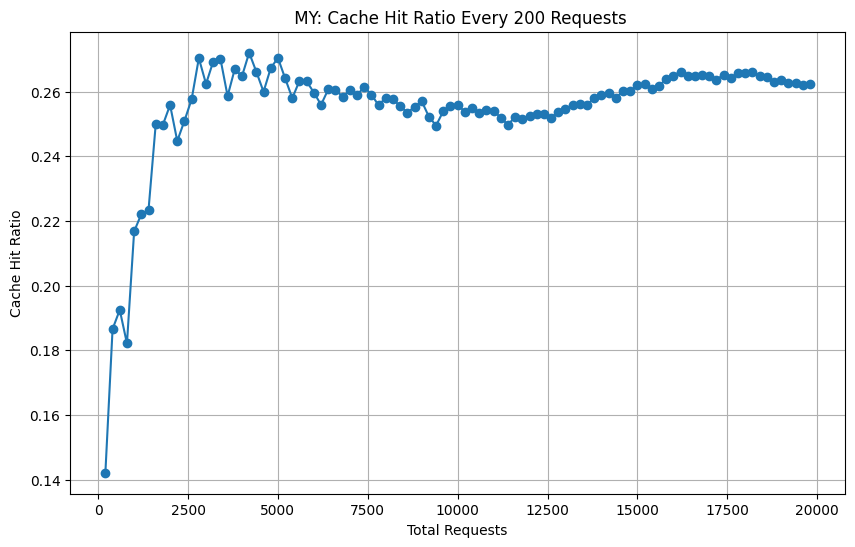

In [84]:
import pandas as pd
from collections import defaultdict

cache_hit = 0
total_requests = len(future_requests)

# Add an additional column indicating the number of visits per video
future_requests['access_count'] = future_requests.groupby('movie_id').cumcount() + 1

# Iterate over each row of the DataFrame
for index, row in future_requests.iterrows():
    user_id = row['user_id']
    movie_id = row['movie_id']
    access_count = row['access_count']

    if(index % 200 == 0 and index != 0):
        print("-------------")
        print(cache_hit/index)
    
    # Check if this movie_id is in this user's cache
    cached_movies = user_caches[user_id]
    if np.any(cached_movies == movie_id):
        print(f"User {user_id} already has movie {movie_id} cached.")
        cache_hit += 1
    else:
        # Cache priority calculation for all videos in the film table movie_ids
        movie_ids['cache_priority'] = movie_ids.apply(
            lambda x: 0.2 * len(history_requests[history_requests['movie_id'] == x['movie_id']]) + 
                      0.2 * ((total_requests - x.name) / total_requests) + 
                      0.6 * predict_rating_item_based(user_id, movie_id), axis=1
        )
        
        # Select the highest priority 10 for caching
        top_10_movies = movie_ids.nlargest(60, 'cache_priority')['movie_id'].tolist()
        
        # Updating the user's cache
        user_caches[user_id] = [(movie_id, future_requests[future_requests['movie_id'] == movie_id].index[0]) for movie_id in top_10_movies]
        # print(f"User {user_id}'s cache updated with top 10 movies based on priority.")
    # Update History Request DataFrame
    history_requests = pd.concat([history_requests, pd.DataFrame([row])], ignore_index=True)

print("----------------show the result--------------------")
print(f"Final cache hit ratio:{cache_hit/20000.0}")


Use cache hit ratio as an indicator to evaluate the performance of different cache replacement algorithms, and select LRU (least recently used) algorithm and LFU (least frequently used) algorithm for comparison.

Final Cache Hit Ratio: 0.14840


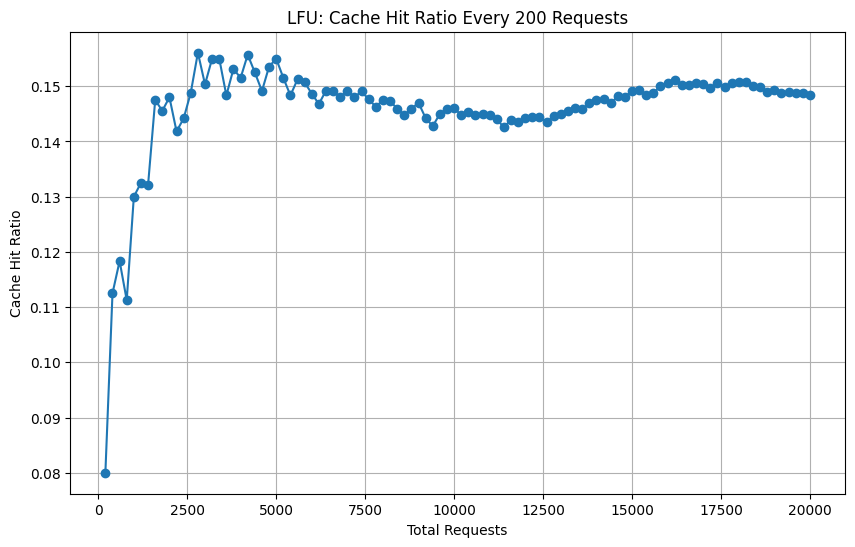

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict, OrderedDict

user_caches = {} 
cache_hits = 0
total_requests = 0
interval_cache_hit_ratios = []

# Traverse every row in the DataFrame
for index, row in future_requests.iterrows():
    user_id = row['user_id']
    movie_id = row['movie_id']
    total_requests += 1

    if user_id not in user_caches:
        user_caches[user_id] = {'movies': OrderedDict(), 'counts': defaultdict(set)}

    if movie_id in user_caches[user_id]['movies']:
        cache_hits += 1
        # Increase access count
        old_count = user_caches[user_id]['movies'][movie_id]
        new_count = old_count + 1
        user_caches[user_id]['movies'][movie_id] = new_count
        # Update counts dict
        user_caches[user_id]['counts'][old_count].remove(movie_id)
        if not user_caches[user_id]['counts'][old_count]:
            del user_caches[user_id]['counts'][old_count]
        user_caches[user_id]['counts'][new_count].add(movie_id)
    else:
        if len(user_caches[user_id]['movies']) < 60:
            user_caches[user_id]['movies'][movie_id] = 1
            user_caches[user_id]['counts'][1].add(movie_id)
        else:
            # Remove the least frequently used item
            least_freq, least_movies = min(user_caches[user_id]['counts'].items())
            least_movie = least_movies.pop()
            if not least_movies:
                del user_caches[user_id]['counts'][least_freq]
            del user_caches[user_id]['movies'][least_movie]
            user_caches[user_id]['movies'][movie_id] = 1
            user_caches[user_id]['counts'][1].add(movie_id)

    if total_requests % 200 == 0:
        cache_hit_ratio = cache_hits / total_requests
        interval_cache_hit_ratios.append(cache_hit_ratio)

# Final cache hit ratio
cache_hit_ratio = cache_hits / total_requests if total_requests > 0 else 0
print(f"Final Cache Hit Ratio: {cache_hit_ratio:.5f}")

# Plotting the cache hit ratio
plt.figure(figsize=(10, 6))
plt.plot(range(200, total_requests+1, 200), interval_cache_hit_ratios, marker='o')
plt.xlabel('Total Requests')
plt.ylabel('Cache Hit Ratio')
plt.title('LFU: Cache Hit Ratio Every 200 Requests')
plt.grid(True)
plt.show()


Final Cache Hit Ratio: 0.15255


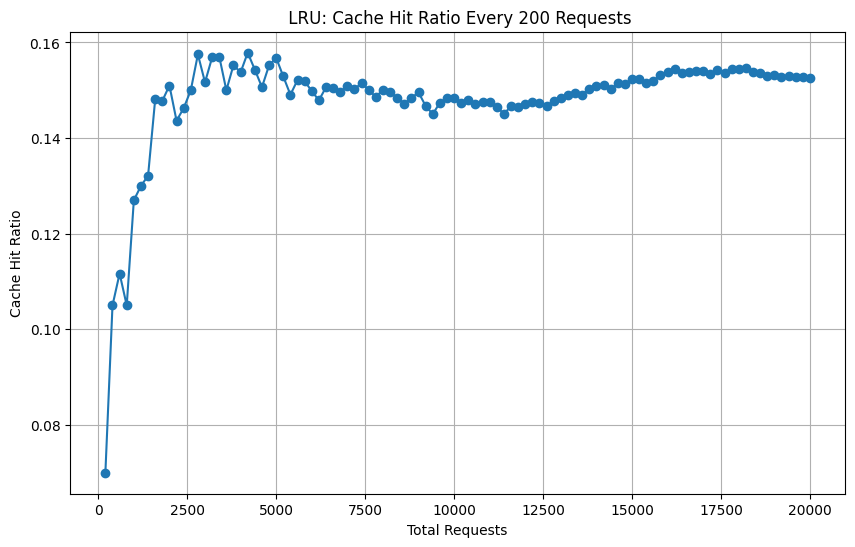

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict


user_caches = {} 
cache_hits = 0
total_requests = 0
interval_cache_hit_ratios = []

# Traverse every row in the DataFrame
for index, row in future_requests.iterrows():
    user_id = row['user_id']
    movie_id = row['movie_id']
    total_requests += 1
    
    # Check if this movie_id is already in this user's cache
    if user_id not in user_caches:
        user_caches[user_id] = OrderedDict()
    
    if movie_id in user_caches[user_id]:
        cache_hits += 1
        # Move to the end of OrderedDict to indicate recent usage
        user_caches[user_id].move_to_end(movie_id)
    else:
        # Add to cache if not already cached
        if len(user_caches[user_id]) < 60:
            user_caches[user_id][movie_id] = None
        else:
            # Remove the oldest movie if cache size is 10
            oldest_movie, _ = user_caches[user_id].popitem(last=False)
            user_caches[user_id][movie_id] = None
    
    # Calculate cache hit rate at each 200-request interval
    if total_requests % 200 == 0:
        cache_hit_ratio = cache_hits / total_requests
        interval_cache_hit_ratios.append(cache_hit_ratio)
        # print(f"Request {total_requests}: Cache Hit Ratio: {cache_hit_ratio:.5f}")

# Final cache hit ratio
cache_hit_ratio = cache_hits / total_requests if total_requests > 0 else 0
print(f"Final Cache Hit Ratio: {cache_hit_ratio:.5f}")

# Plotting the cache hit ratio
plt.figure(figsize=(10, 6))
plt.plot(range(200, total_requests+1, 200), interval_cache_hit_ratios, marker='o')
plt.xlabel('Total Requests')
plt.ylabel('Cache Hit Ratio')
plt.title(' LRU: Cache Hit Ratio Every 200 Requests')
plt.grid(True)
plt.show()


Final Cache Hit Ratio: 0.14725


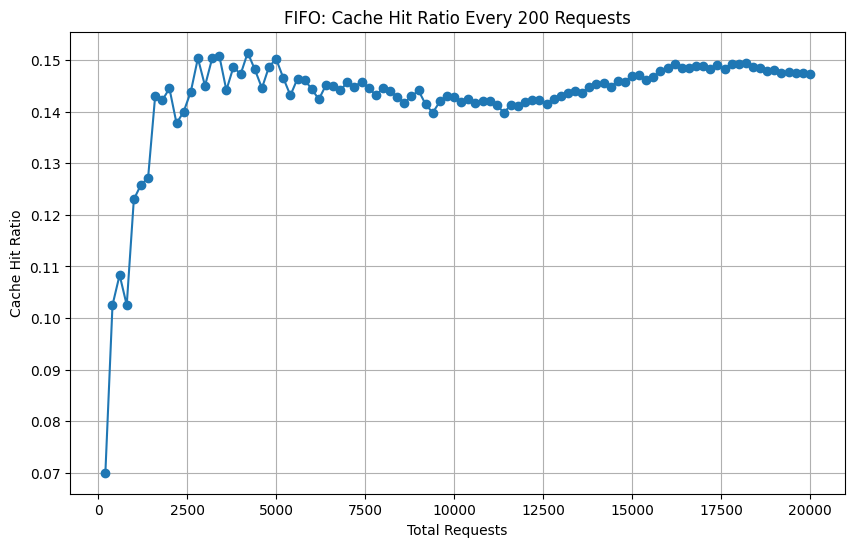

In [86]:
# FIFO
user_caches = {} 
cache_hits = 0
total_requests = 0
interval_cache_hit_ratios = []

for index, row in future_requests.iterrows():
    user_id = row['user_id']
    movie_id = row['movie_id']
    total_requests += 1

    if user_id not in user_caches:
        user_caches[user_id] = OrderedDict()

    if movie_id in user_caches[user_id]:
        cache_hits += 1
    else:
        if len(user_caches[user_id]) < 60:
            user_caches[user_id][movie_id] = None
        else:
            oldest_movie, _ = user_caches[user_id].popitem(last=False)
            user_caches[user_id][movie_id] = None

    if total_requests % 200 == 0:
        cache_hit_ratio = cache_hits / total_requests
        interval_cache_hit_ratios.append(cache_hit_ratio)

cache_hit_ratio = cache_hits / total_requests if total_requests > 0 else 0
print(f"Final Cache Hit Ratio: {cache_hit_ratio:.5f}")

plt.figure(figsize=(10, 6))
plt.plot(range(200, total_requests+1, 200), interval_cache_hit_ratios, marker='o')
plt.xlabel('Total Requests')
plt.ylabel('Cache Hit Ratio')
plt.title('FIFO: Cache Hit Ratio Every 200 Requests')
plt.grid(True)
plt.show()


Simulation of traditional scenarios and visualisation of results

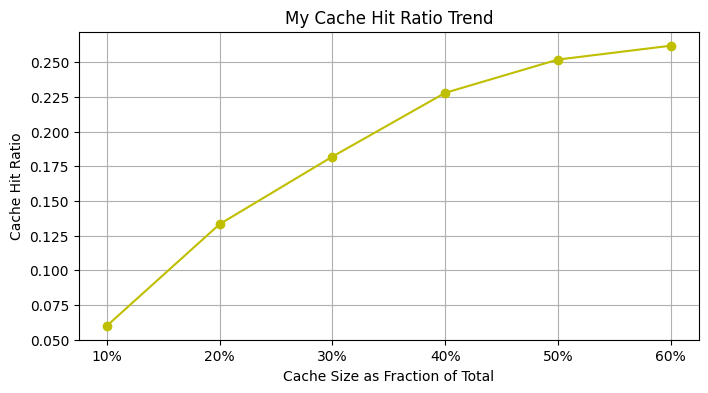

In [36]:

# My_data = [0.06, 0.12, 0.222, 0.278, 0.312, 0.330]
import matplotlib.pyplot as plt

# LFU data points
My_data = [0.06, 0.1333, 0.182, 0.228, 0.252, 0.262]


# Create the trend chart
plt.figure(figsize=(8, 4))  # Set the size of the chart
plt.plot(My_data, marker='o', linestyle='-', color='y')  # Plot with blue line and circle markers
plt.title('My Cache Hit Ratio Trend')  # Set the chart title
plt.xlabel('Cache Size as Fraction of Total')  # Set the x-axis label
plt.ylabel('Cache Hit Ratio')  # Set the y-axis label
plt.xticks(ticks=range(len(My_data)), labels=[f'{10 * (i+1)}%' for i in range(len(My_data))])  # Set x-axis tick labels
plt.grid(True)  # Enable grid
plt.show()  # Display the chart

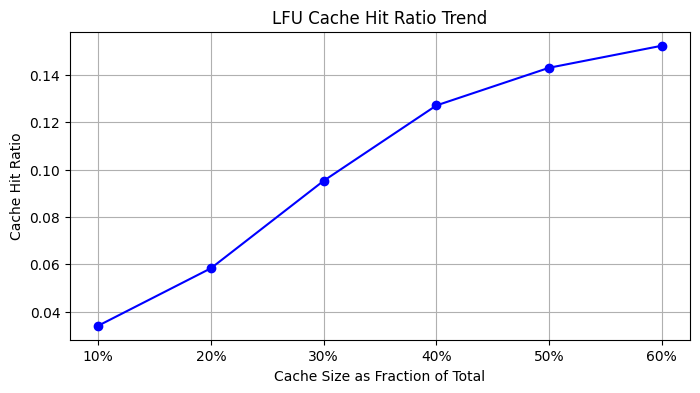

In [283]:
# LFU_data = [0.03, 0.06, 0.1, 0.13, 0.14, 0.15]
import matplotlib.pyplot as plt

# LFU data points
LFU_data = [0.03410, 0.05835, 0.09525, 0.12705,0.14295,0.15225]

# Create the trend chart
plt.figure(figsize=(8, 4))  # Set the size of the chart
plt.plot(LFU_data, marker='o', linestyle='-', color='b')  # Plot with blue line and circle markers
plt.title('LFU Cache Hit Ratio Trend')  # Set the chart title
plt.xlabel('Cache Size as Fraction of Total')  # Set the x-axis label
plt.ylabel('Cache Hit Ratio')  # Set the y-axis label
plt.xticks(ticks=range(len(LFU_data)), labels=[f'{10 * (i+1)}%' for i in range(len(LFU_data))])  # Set x-axis tick labels
plt.grid(True)  # Enable grid
plt.show()  # Display the chart

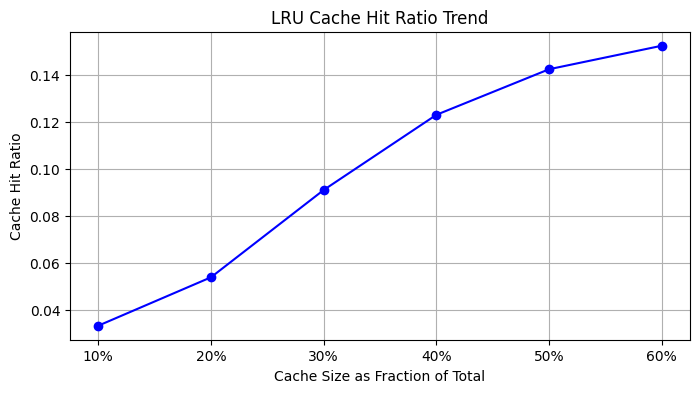

In [284]:
# LFU_data = [0.03, 0.06, 0.1, 0.13, 0.14, 0.15]
import matplotlib.pyplot as plt

# LFU data points
LRU_data = [0.03340, 0.05400, 0.09115, 0.12315, 0.14255, 0.15255]

# Create the trend chart
plt.figure(figsize=(8, 4))  # Set the size of the chart
plt.plot(LRU_data, marker='o', linestyle='-', color='b')  # Plot with blue line and circle markers
plt.title('LRU Cache Hit Ratio Trend')  # Set the chart title
plt.xlabel('Cache Size as Fraction of Total')  # Set the x-axis label
plt.ylabel('Cache Hit Ratio')  # Set the y-axis label
plt.xticks(ticks=range(len(LFU_data)), labels=[f'{10 * (i+1)}%' for i in range(len(LFU_data))])  # Set x-axis tick labels
plt.grid(True)  # Enable grid
plt.show()  # Display the chart

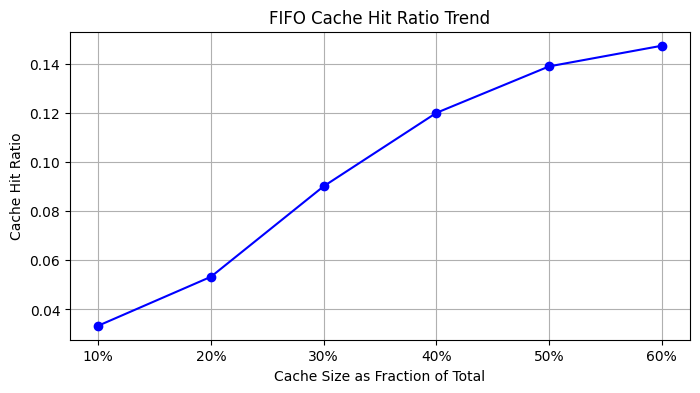

In [285]:
# LFU_data = [0.03, 0.06, 0.1, 0.13, 0.14, 0.15]
import matplotlib.pyplot as plt

# LFU data points
FIFO_data = [0.03340,0.05330, 0.09010,0.11995,0.13885,0.14725]

# Create the trend chart
plt.figure(figsize=(8, 4))  # Set the size of the chart
plt.plot(FIFO_data, marker='o', linestyle='-', color='b')  # Plot with blue line and circle markers
plt.title('FIFO Cache Hit Ratio Trend')  # Set the chart title
plt.xlabel('Cache Size as Fraction of Total')  # Set the x-axis label
plt.ylabel('Cache Hit Ratio')  # Set the y-axis label
plt.xticks(ticks=range(len(LFU_data)), labels=[f'{10 * (i+1)}%' for i in range(len(LFU_data))])  # Set x-axis tick labels
plt.grid(True)  # Enable grid
plt.show()  # Display the chart

Visualisation of results comparison

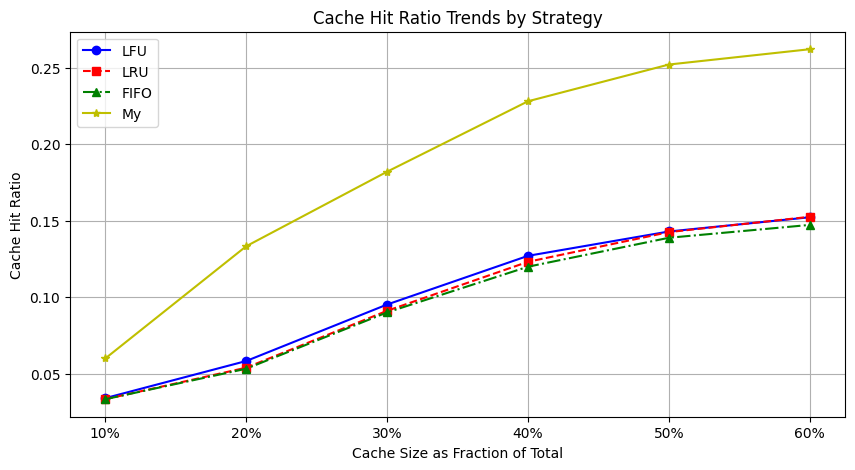

In [286]:
import matplotlib.pyplot as plt

# Data points for each cache replacement strategy
LFU_data = [0.03410, 0.05835, 0.09525, 0.12705,0.14295,0.15225]
LRU_data = [0.03340, 0.05400, 0.09115, 0.12315, 0.14255, 0.15255] 
FIFO_data = [0.03340,0.05330, 0.09010,0.11995,0.13885,0.14725] 

My_data = [0.06, 0.1333, 0.182, 0.228, 0.252, 0.262]
# Create the trend chart
plt.figure(figsize=(10, 5))  # Set the size of the chart
plt.plot(LFU_data, marker='o', linestyle='-', color='b', label='LFU')  # Plot LFU data
plt.plot(LRU_data, marker='s', linestyle='--', color='r', label='LRU')  # Plot LRU data
plt.plot(FIFO_data, marker='^', linestyle='-.', color='g', label='FIFO')  # Plot FIFO data
plt.plot(My_data, marker='*', linestyle='-', color='y', label='My')  # Plot FIFO data



plt.title('Cache Hit Ratio Trends by Strategy')  # Set the chart title
plt.xlabel('Cache Size as Fraction of Total')  # Set the x-axis label
plt.ylabel('Cache Hit Ratio')  # Set the y-axis label
plt.xticks(ticks=range(len(LFU_data)), labels=[f'{10 * (i+1)}%' for i in range(len(LFU_data))])  # Set x-axis tick labels
plt.grid(True)  # Enable grid
plt.legend()  # Show legend
plt.show()  # Display the chart

Cache ratio vs. request volume

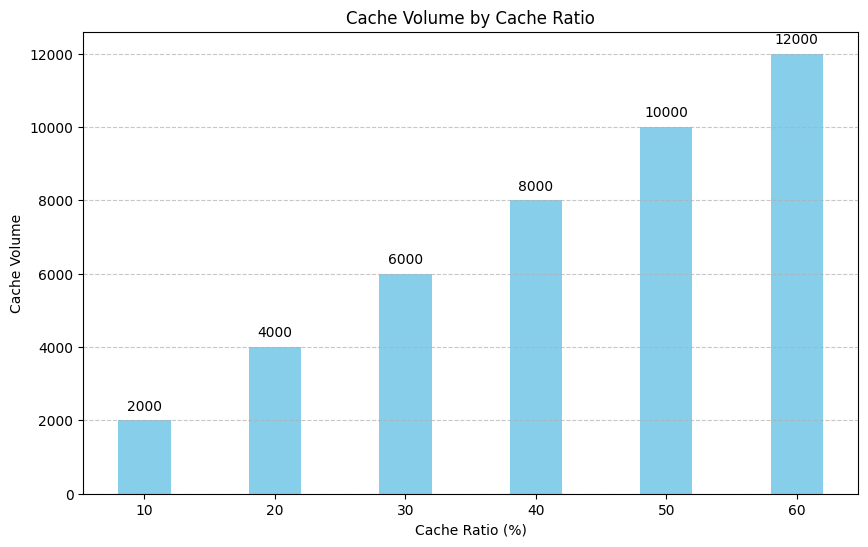

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Cache ratio, from 10 to 60 per cent
cache_ratios = np.array([10, 20, 30, 40, 50, 60])

# of total requests
total_requests = 20000

# Calculate cache size based on cache ratio, cache size = cache ratio/100 * total request size
cache_volumes = (cache_ratios / 100) * total_requests

# Create bar charts
plt.figure(figsize=(10, 6))
bar_width = 4  # Set the width of the column
plt.bar(cache_ratios, cache_volumes, color='skyblue', width=bar_width)

# Labelling of cache values on each column
for i in range(len(cache_ratios)):
    plt.text(cache_ratios[i], cache_volumes[i] + 200, f'{int(cache_volumes[i])}', ha='center', va='bottom')

# Setting up titles and axis labels
plt.title('Cache Volume by Cache Ratio')
plt.xlabel('Cache Ratio (%)')
plt.ylabel('Cache Volume')

# Adjust the x-axis scale to fit wider columns better
plt.xticks(cache_ratios)

# Display grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show charts
plt.show()


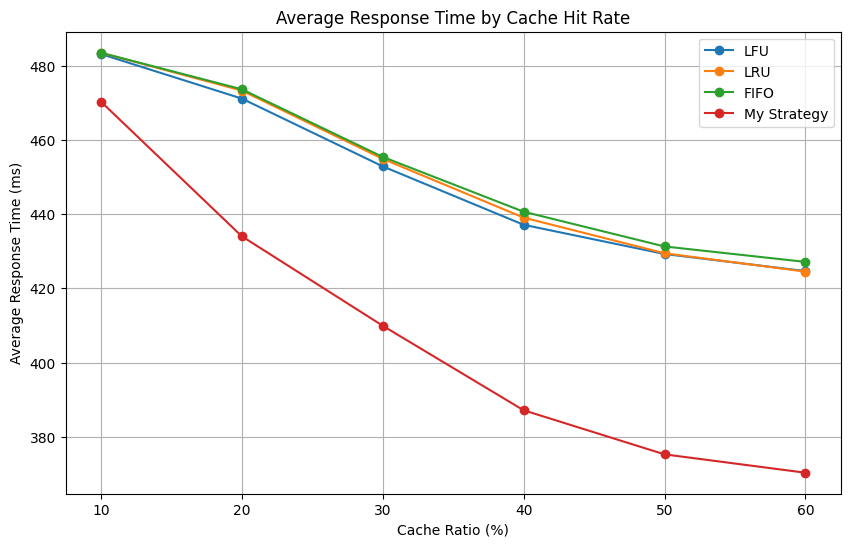

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Return times for hits and misses
hit_time = 5  # ms
miss_time = 500  # ms

# Cache hit data
LFU_data = np.array([0.03410, 0.05835, 0.09525, 0.12705, 0.14295, 0.15225])
LRU_data = np.array([0.03340, 0.05400, 0.09115, 0.12315, 0.14255, 0.15255])
FIFO_data = np.array([0.03340, 0.05330, 0.09010, 0.11995, 0.13885, 0.14725])
My_data = np.array([0.06, 0.1333, 0.182, 0.228, 0.252, 0.262])

# Calculate average return time
def calculate_average_response_time(hit_rates, hit_time, miss_time):
    return (hit_rates * hit_time) + ((1 - hit_rates) * miss_time)

LFU_avg_time = calculate_average_response_time(LFU_data, hit_time, miss_time)
LRU_avg_time = calculate_average_response_time(LRU_data, hit_time, miss_time)
FIFO_avg_time = calculate_average_response_time(FIFO_data, hit_time, miss_time)
My_avg_time = calculate_average_response_time(My_data, hit_time, miss_time)

# Cache ratio
cache_ratios = np.array([10, 20, 30, 40, 50, 60])

# Charting
plt.figure(figsize=(10, 6))
plt.plot(cache_ratios, LFU_avg_time, marker='o', linestyle='-', label='LFU')
plt.plot(cache_ratios, LRU_avg_time, marker='o', linestyle='-', label='LRU')
plt.plot(cache_ratios, FIFO_avg_time, marker='o', linestyle='-', label='FIFO')
plt.plot(cache_ratios, My_avg_time, marker='o', linestyle='-', label='My Strategy')

# Chart format
plt.title('Average Response Time by Cache Hit Rate')
plt.xlabel('Cache Ratio (%)')
plt.ylabel('Average Response Time (ms)')
plt.legend()
plt.grid(True)

# Show charts
plt.show()
